In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from faker import Faker
import random

fake = Faker('ru_RU')

import warnings
warnings.filterwarnings('ignore')

https://www.kaggle.com/datasets/kapturovalexander/bank-credit-scoring/data
## Описание датасета

Эти данные связаны с кампаниями прямого маркетинга португальского банковского учреждения. Маркетинговые кампании были основаны на телефонных звонках. Часто требуется более одного контакта с одним и тем же клиентом, чтобы узнать, будет ли продукт (банковский срочный депозит) подписан ("да") или нет ("нет"). 

- age		$\;\;\;\;\;\;$	Возраст.
- job		$\;\;\;\;\;\;$	Профессия: 
   - 'admin.',
   - 'blue-collar',
   - 'entrepreneur',
   - 'housemaid',
   - 'management',
   - 'retired',
   - 'self-employed',
   - 'services',
   - 'student',
   - 'technician',
   - 'unemployed',
   - 'unknown'.
- marital	$\;\;\;\;\;\;$	Cемейное положение:
   - 'divorced',
   - 'married',
   - 'single',
   - 'unknown'.
   - *`note: 'divorced' means divorced or widowed`*
- education	$\;\;\;\;\;\;$	Степень образования:
   - 'basic.4y',
   - 'basic.6y',
   - 'basic.9y',
   - 'high.school',
   - 'illiterate',
   - 'professional.course',
   - 'university.degree',
   - 'unknown'.
- default		$\;\;\;\;\;\;$	Имеет просроченный кредит?
- balance		$\;\;\;\;\;\;$	Среднегодовой баланс в евро.	
- housing	$\;\;\;\;\;\;$		Имеет жилищный кредит?		
- loan		$\;\;\;\;\;\;$	Имеет личный заем?		
- contact	$\;\;\;\;\;\;$		тип связи с клиентом:
    - 'cellular',
    - 'telephone'.
- day_of_week		$\;\;\;\;\;\;$	Последний день недели, в который произошел контакт с клиентом.
- month	Feature	Date	$\;\;\;\;\;\;$	Последний месяц года, в который произошел контакт с клиентом: 
    - 'jan', 
    - 'feb',
    - 'mar', 
    - ..., 
    - 'nov',
    - 'dec'.
- duration	$\;\;\;\;\;\;$		Продолжительность последнего контакта, в секундах. *`Важное примечание: этот атрибут сильно влияет на конечный результат (например, если duration=0, то y='no'). Однако длительность неизвестна до выполнения вызова. Кроме того, очевидно, что известно время после завершения вызова. Таким образом, эти исходные данные следует включать только для целей сравнения и от них следует отказаться, если цель состоит в том, чтобы получить реалистичную прогностическую модель.`*
- campaign		$\;\;\;\;\;\;$		Количество контактов, осуществленных в ходе данной кампании и для данного клиента. 
- pdays		$\;\;\;\;\;\;$	Количество дней, прошедших с момента последнего контакта с клиентом в рамках предыдущей кампании. *`-1 означает, что с клиентом ранее не связывались.`*
- previous	$\;\;\;\;\;\;$		Количество контактов, совершенных до начала данной кампании и для данного клиента.
- poutcome	$\;\;\;\;\;\;$		итоги предыдущей маркетинговой кампании
    - 'failure',
    - 'nonexistent',
    - 'success'.
- y	$\;\;\;\;\;\;$ Целевая переменная. Оформил ли клиент срочный депозит?

In [2]:
df = pd.read_csv("bank.csv" , sep=";")

In [3]:
df.shape

(4521, 17)

1. Выполнить над датафреймом следующие операции:
   - head()
   - describe()
   - Считывание значения конкретной ячейки (с конкретным индексом из конкретной колонки).
   - Фильтрация строк по диапазону индекса.
   - Фильтрация набора данных по какому-либо условию.
   - Работа с пропущенными значениями:
        - удаление строк с пропущенными значениями;
        - заполнение пропущенных значений средним значением по колонке.
        - `Если пропущенных значений нет - намеренно их сгенерировать, прибить какие-то куски данных в np.nan.`

   - Создание нового поля, вычисленного на основе значений других полей:
        - через выражение на базе имеющихся колонок;
        - через DataFrame.apply;
        - через Series.apply.
   - Сортировка по какому-либо из полей.
   - Вычисление нескольких статистик по колонкам (использовать встроенные агрегатные функции - любые на выбор).
   - Вывод по какому-либо полю / набору полей числа значений с использованием .value_counts().
   - Вывод уникальных значений какой-либо колонки с использованием .unique().
   - Удаление текущего индекса, и создание нового индекса на базе новой колонки, которая для этого лучше всего подходит - см. reset_index и set_index.

2. Продемонстрировать работу .groupby, на основе группировок в groupby вычислить агрегатные функции по одной или нескольким колонкам.

3. Решейпинг данных 1D → 2D с использованием .pivot (можно подать на вход результаты агрегатов, полученных ранее с использованием .groupby (сгруппировать по двум полям).

4. Решейпинг 1D → 2D данных, соединённых с группировкой / агрегацией (одним словом - сводная таблица): .pivot_table. Группировать только по категориальным полям или числовым, если значений немного.
`Если значений много, то необходимо их загрубить. Например, вычислить гистограмму как в задании (8).`

5. Вычислить квантили распределения какого-либо вещественного признака (с использованием numpy.quantile или numpy.percentile).

6. Вычислить (в виде текста) гистограмму какого-либо вещественного признака (с использованием numpy.histogram). Значения гистограммы можно использовать в качестве загрубленного числового признака для заданий (5) или (6).

7. Проитерировать DataFrame построчно .iterrows() и выполнить какую-либо операцию внутри цикла.

8. Получить DataFrame с MultiIndex любым способом: через конструктор (в документации есть множество видов конструкторов для создания MultiIndex с нуля), через read_sql / read_csv / read_excel, read_*, через pivot_table, через groupby или иными способами.

    - Переставить местами уровни индекса.
    - Транспонировать таблицу (или создать новую другую) с MultiIndex.
    - Удалить один из уровней индекса или добавить новый уровень индекса (можно инициализированный константой) - см. документацию.
    
9. Продемонстировать работу .merge.

10. Продемонстрировать работу с .concat или append.

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


Посмотрим основные статистики для числовых стобцов

In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


Посмотрим значение среднегодового баланса у случайного клиента.

In [6]:
index = random.randint(0, len(df) - 1)

print(
      f"Номер клиента в датасете: {index}\n"
      f"Среднегодовой баланс данного клиента:{df['balance'].iloc[index]}"
     )

Номер клиента в датасете: 3343
Среднегодовой баланс данного клиента:-378


Возьмем срез данного датасета.

In [7]:
df_slice = df.iloc[456:732]

In [8]:
df_slice.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
456,34,self-employed,single,tertiary,no,5462,no,no,cellular,30,apr,430,1,-1,0,unknown,yes
457,25,services,single,secondary,no,402,no,yes,cellular,7,jul,264,1,-1,0,unknown,no
458,40,technician,single,secondary,no,641,no,no,cellular,16,jul,156,6,-1,0,unknown,no
459,43,management,divorced,tertiary,no,36,no,no,cellular,26,may,118,1,102,2,failure,no
460,55,unemployed,married,tertiary,no,383,no,no,unknown,6,may,343,3,-1,0,unknown,no


In [9]:
df_slice.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
727,29,student,single,unknown,no,2929,no,no,cellular,11,aug,91,1,-1,0,unknown,no
728,57,technician,married,secondary,no,3071,yes,yes,cellular,7,may,63,3,-1,0,unknown,no
729,47,management,single,tertiary,no,153,yes,no,cellular,18,nov,192,2,-1,0,unknown,no
730,38,self-employed,single,secondary,no,1146,yes,no,unknown,21,may,91,2,-1,0,unknown,no
731,48,blue-collar,married,primary,no,1092,no,yes,cellular,18,nov,79,1,172,8,failure,no


Выберем тех клиентов банка, у которых среднегодовой баланс превышает 1500.

In [10]:
df_filter_balance = df.loc[df["balance"] > 1500]

In [11]:
df_filter_balance.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
10,39,services,married,secondary,no,9374,yes,no,unknown,20,may,273,1,-1,0,unknown,no
16,56,technician,married,secondary,no,4073,no,no,cellular,27,aug,239,5,-1,0,unknown,no
17,37,admin.,single,tertiary,no,2317,yes,no,cellular,20,apr,114,1,152,2,failure,no


Теперь поработаем с пропущенными значениями.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [13]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Как можно заметить пропущенных значений нет, тогда давайте добавим в датасет их намеренно, а затем обработаем пропуски. Для этого сгенерируем синтетические данные с помощью библиотек random и faker.

In [14]:
edu_values = df["education"].unique()
edu_values

array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)

In [15]:
contact_values = df["contact"].unique()
contact_values

array(['cellular', 'unknown', 'telephone'], dtype=object)

In [16]:
month_values = df["month"].unique()
month_values

array(['oct', 'may', 'apr', 'jun', 'feb', 'aug', 'jan', 'jul', 'nov',
       'sep', 'mar', 'dec'], dtype=object)

In [17]:
poutcome_values = df["poutcome"].unique()
poutcome_values

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [18]:
new_rows = pd.DataFrame(
    {
     'age': np.nan if random.randint(0, 9) > 3 else int(df["age"].mean() + random.randint(0, 10)),
     'job': fake.job(),
     'marital': 'single' if random.randint(0, 1) else 'married',
     'education': edu_values[random.randint(0, len(edu_values) - 1)],
     'default': 'yes' if random.randint(0, 1) else 'no',
     'balance': np.nan if random.randint(0, 9) > 3 else random.randint(0, df["balance"].max()),
     'housing': 'yes' if random.randint(0, 1) else 'no',
     'loan': 'yes' if random.randint(0, 1) else 'no',
     'contact': contact_values[random.randint(0, len(contact_values) - 1)],
     'day': np.nan if random.randint(0, 9) > 3 else random.randint(1, 30),
     'month': month_values[random.randint(0, len(month_values) - 1)],
     'duration': np.nan if random.randint(0, 9) > 3 else random.randint(10, df["duration"].max()),
     'campaign': np.nan if random.randint(0, 9) > 3 else random.randint(1, df["campaign"].max()),
     'pdays': np.nan if random.randint(0, 9) > 3 else int(df["pdays"].mean()),
     'previous': np.nan if random.randint(0, 9) > 3 else int(df["previous"].mean()),
     'poutcome': poutcome_values[random.randint(0, len(poutcome_values) - 1)],
     'y': 'yes' if random.randint(0, 1) else 'no'
    }
    for _ in range(50))

In [19]:
df_with_nan = pd.concat([df, new_rows], ignore_index=True)
df_with_nan.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4561,47.0,Вирусолог,single,tertiary,yes,NaN,yes,yes,unknown,24.0,dec,1993.0,NaN,NaN,0.0,unknown,yes
4562,47.0,Военный дознаватель,single,primary,yes,NaN,yes,yes,telephone,1.0,nov,NaN,NaN,NaN,NaN,other,yes
4563,47.0,Мясник,married,secondary,no,NaN,yes,yes,unknown,NaN,jun,50.0,7.0,39.0,0.0,unknown,no
4564,43.0,Портной,single,tertiary,no,NaN,yes,yes,cellular,NaN,aug,165.0,NaN,NaN,0.0,failure,yes
4565,NaN,Дизайнер-конструктор,single,primary,no,70110.0,yes,no,telephone,NaN,nov,NaN,1.0,NaN,NaN,success,no
4566,48.0,Профпатолог,single,tertiary,yes,NaN,no,yes,cellular,NaN,mar,NaN,NaN,NaN,NaN,unknown,no
4567,48.0,Аккумуляторщик,single,primary,yes,NaN,no,no,telephone,22.0,feb,NaN,NaN,39.0,0.0,other,yes
4568,NaN,Флорист,single,unknown,no,49827.0,no,no,cellular,NaN,jul,NaN,44.0,39.0,NaN,unknown,yes
4569,NaN,Библиотековед,single,tertiary,no,34079.0,no,yes,telephone,NaN,sep,824.0,6.0,NaN,NaN,unknown,no
4570,NaN,Сурдопедагог,single,unknown,no,NaN,no,no,telephone,NaN,dec,NaN,NaN,39.0,NaN,failure,yes


Удалим строки с пропущенными значениями

In [20]:
df_without_nan = df_with_nan.dropna()
df_without_nan.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4511,46.0,blue-collar,married,secondary,no,668.0,yes,no,unknown,15.0,may,1263.0,2.0,-1.0,0.0,unknown,yes
4512,40.0,blue-collar,married,secondary,no,1100.0,yes,no,unknown,29.0,may,660.0,2.0,-1.0,0.0,unknown,no
4513,49.0,blue-collar,married,secondary,no,322.0,no,no,cellular,14.0,aug,356.0,2.0,-1.0,0.0,unknown,no
4514,38.0,blue-collar,married,secondary,no,1205.0,yes,no,cellular,20.0,apr,45.0,4.0,153.0,1.0,failure,no
4515,32.0,services,single,secondary,no,473.0,yes,no,cellular,7.0,jul,624.0,5.0,-1.0,0.0,unknown,no
4516,33.0,services,married,secondary,no,-333.0,yes,no,cellular,30.0,jul,329.0,5.0,-1.0,0.0,unknown,no
4517,57.0,self-employed,married,tertiary,yes,-3313.0,yes,yes,unknown,9.0,may,153.0,1.0,-1.0,0.0,unknown,no
4518,57.0,technician,married,secondary,no,295.0,no,no,cellular,19.0,aug,151.0,11.0,-1.0,0.0,unknown,no
4519,28.0,blue-collar,married,secondary,no,1137.0,no,no,cellular,6.0,feb,129.0,4.0,211.0,3.0,other,no
4520,44.0,entrepreneur,single,tertiary,no,1136.0,yes,yes,cellular,3.0,apr,345.0,2.0,249.0,7.0,other,no


Заменим значения nan средними значениями по столбцам

In [21]:
df_without_nan = df_with_nan.fillna(round(df.mean(numeric_only=True)))
df_without_nan.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4561,47.0,Вирусолог,single,tertiary,yes,1423.0,yes,yes,unknown,24.0,dec,1993.0,3.0,40.0,0.0,unknown,yes
4562,47.0,Военный дознаватель,single,primary,yes,1423.0,yes,yes,telephone,1.0,nov,264.0,3.0,40.0,1.0,other,yes
4563,47.0,Мясник,married,secondary,no,1423.0,yes,yes,unknown,16.0,jun,50.0,7.0,39.0,0.0,unknown,no
4564,43.0,Портной,single,tertiary,no,1423.0,yes,yes,cellular,16.0,aug,165.0,3.0,40.0,0.0,failure,yes
4565,41.0,Дизайнер-конструктор,single,primary,no,70110.0,yes,no,telephone,16.0,nov,264.0,1.0,40.0,1.0,success,no
4566,48.0,Профпатолог,single,tertiary,yes,1423.0,no,yes,cellular,16.0,mar,264.0,3.0,40.0,1.0,unknown,no
4567,48.0,Аккумуляторщик,single,primary,yes,1423.0,no,no,telephone,22.0,feb,264.0,3.0,39.0,0.0,other,yes
4568,41.0,Флорист,single,unknown,no,49827.0,no,no,cellular,16.0,jul,264.0,44.0,39.0,1.0,unknown,yes
4569,41.0,Библиотековед,single,tertiary,no,34079.0,no,yes,telephone,16.0,sep,824.0,6.0,40.0,1.0,unknown,no
4570,41.0,Сурдопедагог,single,unknown,no,1423.0,no,no,telephone,16.0,dec,264.0,3.0,39.0,1.0,failure,yes


Проверим, остались ли пропущенные значения.

In [22]:
df_without_nan.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Создадим новый столбец, отражающий возможный месячный доход со счета при среднегодовом балансе клиента. Будем опираться на процентную ставку в 21%. 

In [23]:
month_percentage = 0.21 / 12

df["estimated_month_credit_income"] = df["balance"] * month_percentage
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,estimated_month_credit_income
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,31.2725
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,83.8075
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,23.6250
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,25.8300
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no,-5.8275
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no,-57.9775
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no,5.1625
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no,19.8975


Теперь создадим столбец клиентов для которых рекомендовано выгодное предложение по подписке Premium. Будем выбирать для рекоммендации тех клиентов, которые ранее не брали ни потребительский, ни жилищный кредит, а также имеют положительный среднегодовой баланс.

In [24]:
def sub_reccomended(balance, housing, loan):
    if balance > 0 and housing == "no" and loan == "no":
        return "yes"
    return "no"

df["subscription_recommend"] = df.apply(lambda x: sub_reccomended(x["balance"],  x["housing"], x["loan"]), axis=1)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,estimated_month_credit_income,subscription_recommend
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,31.2725,yes
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,83.8075,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,23.6250,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,25.8300,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,0.0000,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no,-5.8275,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no,-57.9775,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no,5.1625,yes
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no,19.8975,yes


Отсортируем пользователей по возрастанию на основе среднегодового баланса.

In [25]:
df.sort_values(by="balance")

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,estimated_month_credit_income,subscription_recommend
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no,-57.9775,no
2398,51,entrepreneur,married,secondary,yes,-2082,no,yes,cellular,28,jul,123,6,-1,0,unknown,no,-36.4350,no
2538,44,management,married,secondary,no,-1746,yes,no,unknown,20,jun,218,1,-1,0,unknown,no,-30.5550,no
856,49,technician,married,secondary,yes,-1680,yes,yes,unknown,27,jun,92,4,-1,0,unknown,no,-29.4000,no
3584,46,blue-collar,married,secondary,no,-1400,yes,no,telephone,6,may,309,3,355,4,failure,no,-24.5000,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3830,57,technician,married,tertiary,no,27069,no,yes,unknown,20,jun,174,3,-1,0,unknown,no,473.7075,no
1881,36,management,married,tertiary,no,27359,yes,no,unknown,3,jun,71,2,-1,0,unknown,no,478.7825,no
1483,43,technician,single,tertiary,no,27733,yes,no,unknown,3,jun,164,7,-1,0,unknown,no,485.3275,no
2989,42,entrepreneur,married,tertiary,no,42045,no,no,cellular,8,aug,205,2,-1,0,unknown,no,735.7875,yes


Вычислим некоторые полезные статистики для числовых столбцов.

In [26]:
df.agg({"age": ["min", "max", "mean", "var"], 
        "balance": ["min", "max", "mean", "var"], 
        "duration": ["min", "max", "mean", "var"]})

,age,balance,duration
min,19.000000,-3.313000e+03,4.000000
max,87.000000,7.118800e+04,3025.000000
mean,41.170095,1.422658e+03,263.961292
var,111.856238,9.057922e+06,67525.469519


Посмотрим на распределение клиенетов по семейному положению.

In [27]:
df.value_counts("marital")

marital
married     2797
single      1196
divorced     528
Name: count, dtype: int64

Выведем уникальные значения атрибута job.

In [28]:
df["job"].unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

In [29]:
df["job"].nunique()

12

Удалим текущий индекс и создадим новый на базе колонки uuid.

In [30]:
df.head()
df["customer_name"] = [fake.first_name_male() if random.randint(0, 1) else fake.first_name_female() for _ in range(len(df))]
df["uuid"] = [fake.uuid4() for _ in range(len(df))]
df

,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,y,estimated_month_credit_income,subscription_recommend,customer_name,uuid
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,...,79,1,-1,0,unknown,no,31.2725,yes,Лора,3b3a41c0-6d0e-4a18-8906-7f54269abbab
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,...,220,1,339,4,failure,no,83.8075,no,Зоя,fa33708a-9441-4005-a35d-863c78ec6894
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,...,185,1,330,1,failure,no,23.6250,no,Добромысл,5b24f5ca-f096-4950-b37a-c93ef18164f4
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,...,199,4,-1,0,unknown,no,25.8300,no,Филарет,68e77444-7b61-4ee5-91eb-2e622a5e08ba
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,...,226,1,-1,0,unknown,no,0.0000,no,Фёкла,18993d47-c7d6-417e-81e9-f325ae212f0d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,...,329,5,-1,0,unknown,no,-5.8275,no,Потап,ef9e92fd-5420-477a-8d17-7f661829247e
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,...,153,1,-1,0,unknown,no,-57.9775,no,Константин,ff11f89d-f847-4257-b02c-85ca1f846be0
4518,57,technician,married,secondary,no,295,no,no,cellular,19,...,151,11,-1,0,unknown,no,5.1625,yes,Лариса,c4b8b61d-f8be-4b0b-a3ca-b6647e974a2a
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,...,129,4,211,3,other,no,19.8975,yes,Полина,5440c277-5823-4e35-9e5c-ea0163143443


In [31]:
df.reset_index()

,index,age,job,marital,education,default,balance,housing,loan,contact,...,duration,campaign,pdays,previous,poutcome,y,estimated_month_credit_income,subscription_recommend,customer_name,uuid
0,0,30,unemployed,married,primary,no,1787,no,no,cellular,...,79,1,-1,0,unknown,no,31.2725,yes,Лора,3b3a41c0-6d0e-4a18-8906-7f54269abbab
1,1,33,services,married,secondary,no,4789,yes,yes,cellular,...,220,1,339,4,failure,no,83.8075,no,Зоя,fa33708a-9441-4005-a35d-863c78ec6894
2,2,35,management,single,tertiary,no,1350,yes,no,cellular,...,185,1,330,1,failure,no,23.6250,no,Добромысл,5b24f5ca-f096-4950-b37a-c93ef18164f4
3,3,30,management,married,tertiary,no,1476,yes,yes,unknown,...,199,4,-1,0,unknown,no,25.8300,no,Филарет,68e77444-7b61-4ee5-91eb-2e622a5e08ba
4,4,59,blue-collar,married,secondary,no,0,yes,no,unknown,...,226,1,-1,0,unknown,no,0.0000,no,Фёкла,18993d47-c7d6-417e-81e9-f325ae212f0d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,4516,33,services,married,secondary,no,-333,yes,no,cellular,...,329,5,-1,0,unknown,no,-5.8275,no,Потап,ef9e92fd-5420-477a-8d17-7f661829247e
4517,4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,...,153,1,-1,0,unknown,no,-57.9775,no,Константин,ff11f89d-f847-4257-b02c-85ca1f846be0
4518,4518,57,technician,married,secondary,no,295,no,no,cellular,...,151,11,-1,0,unknown,no,5.1625,yes,Лариса,c4b8b61d-f8be-4b0b-a3ca-b6647e974a2a
4519,4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,...,129,4,211,3,other,no,19.8975,yes,Полина,5440c277-5823-4e35-9e5c-ea0163143443


In [32]:
df.set_index("uuid")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,y,estimated_month_credit_income,subscription_recommend,customer_name,uuid
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,...,79,1,-1,0,unknown,no,31.2725,yes,Лора,3b3a41c0-6d0e-4a18-8906-7f54269abbab
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,...,220,1,339,4,failure,no,83.8075,no,Зоя,fa33708a-9441-4005-a35d-863c78ec6894
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,...,185,1,330,1,failure,no,23.6250,no,Добромысл,5b24f5ca-f096-4950-b37a-c93ef18164f4
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,...,199,4,-1,0,unknown,no,25.8300,no,Филарет,68e77444-7b61-4ee5-91eb-2e622a5e08ba
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,...,226,1,-1,0,unknown,no,0.0000,no,Фёкла,18993d47-c7d6-417e-81e9-f325ae212f0d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,...,329,5,-1,0,unknown,no,-5.8275,no,Потап,ef9e92fd-5420-477a-8d17-7f661829247e
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,...,153,1,-1,0,unknown,no,-57.9775,no,Константин,ff11f89d-f847-4257-b02c-85ca1f846be0
4518,57,technician,married,secondary,no,295,no,no,cellular,19,...,151,11,-1,0,unknown,no,5.1625,yes,Лариса,c4b8b61d-f8be-4b0b-a3ca-b6647e974a2a
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,...,129,4,211,3,other,no,19.8975,yes,Полина,5440c277-5823-4e35-9e5c-ea0163143443


Сгруппируем данные по семейному положению и посмотрим средний баланс для каждой из групп.

In [33]:
df


,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,y,estimated_month_credit_income,subscription_recommend,customer_name,uuid
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,...,79,1,-1,0,unknown,no,31.2725,yes,Лора,3b3a41c0-6d0e-4a18-8906-7f54269abbab
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,...,220,1,339,4,failure,no,83.8075,no,Зоя,fa33708a-9441-4005-a35d-863c78ec6894
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,...,185,1,330,1,failure,no,23.6250,no,Добромысл,5b24f5ca-f096-4950-b37a-c93ef18164f4
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,...,199,4,-1,0,unknown,no,25.8300,no,Филарет,68e77444-7b61-4ee5-91eb-2e622a5e08ba
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,...,226,1,-1,0,unknown,no,0.0000,no,Фёкла,18993d47-c7d6-417e-81e9-f325ae212f0d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,...,329,5,-1,0,unknown,no,-5.8275,no,Потап,ef9e92fd-5420-477a-8d17-7f661829247e
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,...,153,1,-1,0,unknown,no,-57.9775,no,Константин,ff11f89d-f847-4257-b02c-85ca1f846be0
4518,57,technician,married,secondary,no,295,no,no,cellular,19,...,151,11,-1,0,unknown,no,5.1625,yes,Лариса,c4b8b61d-f8be-4b0b-a3ca-b6647e974a2a
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,...,129,4,211,3,other,no,19.8975,yes,Полина,5440c277-5823-4e35-9e5c-ea0163143443


In [34]:
marital_status_balance = df.groupby(by="marital")["balance"].agg("mean")
marital_status_balance

marital
divorced    1122.390152
married     1463.195567
single      1460.414716
Name: balance, dtype: float64

Решейпинг данных 1D → 2D с использованием .pivot (можно подать на вход результаты агрегатов, полученных ранее с использованием .groupby (сгруппировать по двум полям).

In [35]:
df.pivot(index=['job', 'education'], columns='uuid', values=['balance'])

balance  \
uuid                    000036d1-215e-4ba8-ae25-7b93d1c85faa   
job           education                                        
admin.        primary                                    NaN   
              secondary                                  NaN   
              tertiary                                   NaN   
              unknown                                    NaN   
blue-collar   primary                                    NaN   
              secondary                                  NaN   
              tertiary                                   NaN   
              unknown                                    NaN   
entrepreneur  primary                                    NaN   
              secondary                                  NaN   
              tertiary                                   NaN   
              unknown                                    NaN   
housemaid     primary                                    NaN   
              secondary                                  NaN   
              tertiary                                   NaN   
              unknown                                    NaN   
management    primary                                    NaN   
              secondary                                  NaN   
              tertiary                                   NaN   
              unknown                                    NaN   
retired       primary                                    NaN   
              secondary                                  NaN   
              tertiary                                   NaN   
              unknown                                    NaN   
self-employed primary                                    NaN   
              secondary                                  NaN   
              tertiary                                   NaN   
              unknown                                    NaN   
services      primary                                    NaN   
              secondary                                109.0   
              tertiary                                   NaN   
              unknown                                    NaN   
student       primary                                    NaN   
              secondary                                  NaN   
              tertiary                                   NaN   
              unknown                                    NaN   
technician    primary                                    NaN   
              secondary                                  NaN   
              tertiary                                   NaN   
              unknown                                    NaN   
unemployed    primary                                    NaN   
              secondary                                  NaN   
              tertiary                                   NaN   
              unknown                                    NaN   
unknown       primary                                    NaN   
              secondary                                  NaN   
              tertiary                                   NaN   
              unknown                                    NaN   

                                                              \
uuid                    000118d4-f15c-4750-9df8-a3fab78f2280   
job           education                                        
admin.        primary                                    NaN   
              secondary                                  NaN   
              tertiary                                   NaN   
              unknown                                    NaN   
blue-collar   primary                                    NaN   
              secondary                                  NaN   
              tertiary                                   NaN   
              unknown                                    NaN   
entrepreneur  primary                                    NaN   
              second

Решейпинг 1D → 2D данных, соединённых с группировкой / агрегацией (одним словом - сводная таблица): .pivot_table. Группировать только по категориальным полям или числовым, если значений немного.
`Если значений много, то необходимо их загрубить. Например, вычислить гистограмму как в задании (8).`

In [36]:
pd.pivot_table(df, values='balance', index=['job', 'education'], columns=['loan'], aggfunc="mean")

loan                              no           yes
job           education                           
admin.        primary     477.750000    181.400000
              secondary  1350.968254    941.397436
              tertiary   1144.045455    482.857143
              unknown    1649.750000    642.000000
blue-collar   primary    1153.334395    609.090909
              secondary  1106.667453    907.150000
              tertiary   2560.363636    462.000000
              unknown    1032.878049           NaN
entrepreneur  primary     362.285714    474.800000
              secondary  1617.439024    453.117647
              tertiary   2814.333333   1936.684211
              unknown     328.181818           NaN
housemaid     primary    1992.000000    235.500000
              secondary  1972.153846   2528.500000
              tertiary   2761.631579     55.000000
              unknown      58.000000  10619.000000
management    primary    3036.424242    754.833333
              secondary  1274.548077   1038.250000
              tertiary   1849.823872   1271.530000
              unknown    2559.800000    217.000000
retired       primary    2858.173333   1041.000000
              secondary  2347.096386   1115.727273
              tertiary   2655.230769   1548.600000
              unknown    1265.142857           NaN
self-employed primary    1765.833333    295.333333
              secondary  1249.571429    926.500000
              tertiary   1701.950617    621.000000
              unknown     506.000000           NaN
services      primary    1206.826087    -37.000000
              secondary  1088.722034    609.147059
              tertiary   1967.538462   1580.000000
              unknown    3280.666667    386.000000
student       primary    1787.500000           NaN
              secondary  1610.425532           NaN
              tertiary   1176.500000   1161.000000
              unknown    1754.875000           NaN
technician    primary    2593.000000           NaN
              secondary  1289.413551    521.815217
              tertiary   1644.367568   1541.000000
              unknown    1526.285714   7108.000000
unemployed    primary    1026.000000    363.833333
              secondary  1042.238095    810.000000
              tertiary   1281.233333    378.000000
              unknown    3919.500000           NaN
unknown       primary     363.500000    341.000000
              secondary  1229.000000           NaN
              tertiary   2497.750000           NaN
              unknown    1648.600000           NaN

Вычислим квантили распределения числовых атрибутов датасета. Во-первых возьмем квантиль уровня 0.5 (т.е. медиану), затем 0.75 и 0.25.

In [37]:
df.quantile([0.5, 0.75, 0.25], numeric_only=True)

,age,balance,day,duration,campaign,pdays,previous,estimated_month_credit_income
0.50,39.0,444.0,16.0,185.0,2.0,-1.0,0.0,7.7700
0.75,49.0,1480.0,21.0,329.0,3.0,-1.0,0.0,25.9000
0.25,33.0,69.0,9.0,104.0,1.0,-1.0,0.0,1.2075


In [38]:
df.median(numeric_only=True)

age                               39.00
balance                          444.00
day                               16.00
duration                         185.00
campaign                           2.00
pdays                             -1.00
previous                           0.00
estimated_month_credit_income      7.77
dtype: float64

Построим гистограмму для продолжительности последнего контакта с клиентом.

<Axes: >

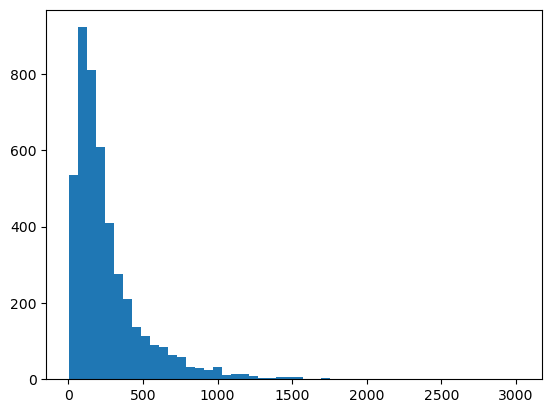

In [39]:
df["duration"].hist(grid=False, bins=50)

Проитерируем DataFrame построчно с помощью .iterrows().

In [40]:
mean_balance = df.balance.mean()
for index, row in df.iterrows():
    if row['balance'] >= mean_balance:
        print(f'Вероятнее всего клиенту {row["customer_name"]} необходимо предложить улучшенные условия для накопительного счета')

Вероятнее всего клиенту Лора необходимо предложить улучшенные условия для накопительного счета
Вероятнее всего клиенту Зоя необходимо предложить улучшенные условия для накопительного счета
Вероятнее всего клиенту Филарет необходимо предложить улучшенные условия для накопительного счета
Вероятнее всего клиенту Лукия необходимо предложить улучшенные условия для накопительного счета
Вероятнее всего клиенту Василиса необходимо предложить улучшенные условия для накопительного счета
Вероятнее всего клиенту Валерия необходимо предложить улучшенные условия для накопительного счета
Вероятнее всего клиенту Радим необходимо предложить улучшенные условия для накопительного счета
Вероятнее всего клиенту Ирина необходимо предложить улучшенные условия для накопительного счета
Вероятнее всего клиенту Сигизмунд необходимо предложить улучшенные условия для накопительного счета
Вероятнее всего клиенту Ефрем необходимо предложить улучшенные условия для накопительного счета
Вероятнее всего клиенту Никандр 

Получим DataFrame с MultiIndex через groupby

In [41]:
df_multi = df.groupby(['marital', 'education'])[['age', 'balance', 'duration']].agg('mean')
df_multi

age      balance    duration
marital  education                                    
divorced primary    51.392405  1072.721519  361.202532
         secondary  43.496296   891.181481  258.237037
         tertiary   45.148387  1437.896774  274.658065
         unknown    50.375000  1849.333333  275.166667
married  primary    47.511407  1371.638783  243.414449
         secondary  42.404345  1272.911002  260.746321
         tertiary   41.777166  1860.719395  256.752407
         unknown    48.444444  1725.547009  262.658120
single   primary    37.013699  2065.753425  285.863014
         secondary  33.052545  1154.008210  296.382594
         tertiary   34.512821  1754.711538  251.194444
         unknown    34.652174  1562.173913  206.500000

Переставим местами уровни индекса

In [42]:
df_multi.swaplevel().head()

,,age,balance,duration
education,marital,,,
primary,divorced,51.392405,1072.721519,361.202532
secondary,divorced,43.496296,891.181481,258.237037
tertiary,divorced,45.148387,1437.896774,274.658065
unknown,divorced,50.375000,1849.333333,275.166667
primary,married,47.511407,1371.638783,243.414449


In [43]:
df_multi.swaplevel().sort_index().head()

age      balance    duration
education marital                                     
primary   divorced  51.392405  1072.721519  361.202532
          married   47.511407  1371.638783  243.414449
          single    37.013699  2065.753425  285.863014
secondary divorced  43.496296   891.181481  258.237037
          married   42.404345  1272.911002  260.746321

Транспонируем

In [44]:
df_multi.T.head()

marital       divorced                                            married  \
education      primary   secondary     tertiary      unknown      primary   
age          51.392405   43.496296    45.148387    50.375000    47.511407   
balance    1072.721519  891.181481  1437.896774  1849.333333  1371.638783   
duration    361.202532  258.237037   274.658065   275.166667   243.414449   

marital                                                single               \
education    secondary     tertiary      unknown      primary    secondary   
age          42.404345    41.777166    48.444444    37.013699    33.052545   
balance    1272.911002  1860.719395  1725.547009  2065.753425  1154.008210   
duration    260.746321   256.752407   262.658120   285.863014   296.382594   

marital                              
education     tertiary      unknown  
age          34.512821    34.652174  
balance    1754.711538  1562.173913  
duration    251.194444   206.500000

Удалим один из уровней индекса

In [45]:
df_multi.reset_index(level=0)

,marital,age,balance,duration
education,,,,
primary,divorced,51.392405,1072.721519,361.202532
secondary,divorced,43.496296,891.181481,258.237037
tertiary,divorced,45.148387,1437.896774,274.658065
unknown,divorced,50.375000,1849.333333,275.166667
primary,married,47.511407,1371.638783,243.414449
secondary,married,42.404345,1272.911002,260.746321
tertiary,married,41.777166,1860.719395,256.752407
unknown,married,48.444444,1725.547009,262.658120
primary,single,37.013699,2065.753425,285.863014


Разделим Dataframe на две таблицы и продемонстрируем работу .merge

In [47]:
df_1 = df[['uuid', 'customer_name', 'age']].copy()
df_2 = df[['uuid', 'balance', 'estimated_month_credit_income', 'subscription_recommend']].copy()

df_1.merge(df_2, how='inner', on='uuid')

,uuid,customer_name,age,balance,estimated_month_credit_income,subscription_recommend
0,3b3a41c0-6d0e-4a18-8906-7f54269abbab,Лора,30,1787,31.2725,yes
1,fa33708a-9441-4005-a35d-863c78ec6894,Зоя,33,4789,83.8075,no
2,5b24f5ca-f096-4950-b37a-c93ef18164f4,Добромысл,35,1350,23.6250,no
3,68e77444-7b61-4ee5-91eb-2e622a5e08ba,Филарет,30,1476,25.8300,no
4,18993d47-c7d6-417e-81e9-f325ae212f0d,Фёкла,59,0,0.0000,no
...,...,...,...,...,...,...
4516,ef9e92fd-5420-477a-8d17-7f661829247e,Потап,33,-333,-5.8275,no
4517,ff11f89d-f847-4257-b02c-85ca1f846be0,Константин,57,-3313,-57.9775,no
4518,c4b8b61d-f8be-4b0b-a3ca-b6647e974a2a,Лариса,57,295,5.1625,yes
4519,5440c277-5823-4e35-9e5c-ea0163143443,Полина,28,1137,19.8975,yes


Разделим Dataframe и продемонстрируем работу .concat

In [48]:
df_1 = df.iloc[:2260]
df_2 = df.iloc[2260:]

pd.concat([df_1, df_2], axis=0, ignore_index=True)

,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,y,estimated_month_credit_income,subscription_recommend,customer_name,uuid
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,...,79,1,-1,0,unknown,no,31.2725,yes,Лора,3b3a41c0-6d0e-4a18-8906-7f54269abbab
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,...,220,1,339,4,failure,no,83.8075,no,Зоя,fa33708a-9441-4005-a35d-863c78ec6894
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,...,185,1,330,1,failure,no,23.6250,no,Добромысл,5b24f5ca-f096-4950-b37a-c93ef18164f4
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,...,199,4,-1,0,unknown,no,25.8300,no,Филарет,68e77444-7b61-4ee5-91eb-2e622a5e08ba
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,...,226,1,-1,0,unknown,no,0.0000,no,Фёкла,18993d47-c7d6-417e-81e9-f325ae212f0d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,...,329,5,-1,0,unknown,no,-5.8275,no,Потап,ef9e92fd-5420-477a-8d17-7f661829247e
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,...,153,1,-1,0,unknown,no,-57.9775,no,Константин,ff11f89d-f847-4257-b02c-85ca1f846be0
4518,57,technician,married,secondary,no,295,no,no,cellular,19,...,151,11,-1,0,unknown,no,5.1625,yes,Лариса,c4b8b61d-f8be-4b0b-a3ca-b6647e974a2a
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,...,129,4,211,3,other,no,19.8975,yes,Полина,5440c277-5823-4e35-9e5c-ea0163143443
